## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [2]:
# Your code here - remember to use markdown cells for comments as well!

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Data/Aviation_Data.csv')
df

C:\Users\user\AppData\Local\Temp\ipykernel_4120\1498977716.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/Aviation_Data.csv')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

Convert Event.Date to datetime and handle errors

In [6]:
df['Event.Date'] =pd.to_datetime(df['Event.Date'], errors = 'coerce')


In [7]:
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


Drop rows with invalid dates (pre- 1960s or NaT)

In [8]:
df = df.dropna(subset=['Event.Date'])
df = df[df['Event.Date'].dt.year >= 1961]


Clean Investigation.Type - Keep only 'Accident' or 'Incident' 

In [9]:
df = df[df['Investigation.Type'].isin(['Accident', 'Incident'])]

Now we filter the data to US only to stream-line the data a little better.

In [10]:
df = df[df['Country'].str.contains('United States', na=False)]

Filter the data to U.S only

In [11]:
df = df[df['Country'] == 'United States']

Filter the data to post - 2000 for modern relevance

In [12]:
df = df[df['Event.Date'].dt.year >= 2000]

Filter to airplane category only. Drop Helicopters etc.

In [13]:
df = df[df['Aircraft.Category'] == 'Airplane']

Filter the Aircraft to relevant purposes eg. Personal, business, executive.

In [14]:
relevant_purposes = ['Personal', 'Business', 'Executive/corporate']
df = df[df['Purpose.of.flight'].isin(relevant_purposes)] 

Handle missing injuries: Fill NaNs with 0 (Assuming no injuries if not reported)

In [15]:
injury_columns = ['Injury.Severity', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
                  'Total.Minor.Injuries', 'Total.Uninjured']
df[injury_columns] = df[injury_columns].fillna(0)

Calculate total people involved

In [16]:
df['Total.People'] = df[injury_columns[1:]].sum(axis=1)

Drop rows with 0 total people involved

In [17]:
df = df[df['Total.People'] > 0]

Standardize Make and Model to upper-case and strip whitespace

In [18]:
df['Make'] = df['Make'].str.upper().str.strip()
df['Model'] = df['Model'].str.upper().str.strip()

Drop unnecessary columns for focus

In [19]:
df = df[['Event.Date', 'Make', 'Model', 'Purpose.of.flight', 'Total.Fatal.Injuries', 
         'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Total.People']]

Final shape after filtering and cleaning

In [20]:
print(df.shape)
df

(14569, 9)


,Event.Date,Make,Model,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.People
47743,2000-01-21,MYERS,Q-2,Personal,0.0,0.0,1.0,0.0,1.0
47869,2000-02-16,CESSNA,182M,Personal,1.0,0.0,0.0,1.0,2.0
48908,2000-07-21,STEEL/VANS,RV6,Personal,0.0,0.0,1.0,0.0,1.0
49949,2001-01-14,LEARJET,LJ-60,Executive/corporate,0.0,2.0,0.0,0.0,2.0
49991,2001-01-24,BEECH,F90-42,Business,4.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...
90318,2022-12-09,ARADO-FLUGZEUGWERKE GMBH,FW190 A-5,Personal,0.0,0.0,0.0,1.0,1.0
90320,2022-12-10,CESSNA,305A,Personal,0.0,0.0,0.0,2.0,2.0
90332,2022-12-14,CIRRUS DESIGN CORP,SR22,Personal,0.0,0.0,0.0,1.0,1.0
90336,2022-12-16,CESSNA,R172K,Personal,0.0,1.0,0.0,0.0,1.0


In [21]:
df.isna().sum() 

Event.Date                0
Make                      1
Model                     2
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Total.People              0
dtype: int64

In [22]:
make_group = df.groupby('Make').agg({
    'Event.Date': 'count',
    'Total.Fatal.Injuries': 'sum',
    'Total.People': 'sum'
}).rename(columns = {'Event.Date' : 'Accidents'})

make_group['Fatality.Rate'] = make_group['Total.Fatal.Injuries'] / make_group['Total.People']

make_group['Avg_Fatal_Per_Accident'] = make_group['Total.Fatal.Injuries'] / make_group['Accidents']



In [23]:
make_group = make_group[make_group['Accidents'] >= 10].sort_values(by='Avg_Fatal_Per_Accident')

In [24]:
model_group = df.groupby(['Make', 'Model']).agg({
    'Event.Date': 'count',
    'Total.Fatal.Injuries': 'sum',
    'Total.People': 'sum'
}).rename(columns = {'Event.Date' : 'Accidents'})

model_group['Fatality.Rate'] = model_group['Total.Fatal.Injuries'] / model_group['Total.People']

model_group['Avg_Fatal_Per_Accident'] = model_group['Total.Fatal.Injuries'] / model_group['Accidents']



In [25]:
model_group =  model_group[model_group['Accidents'] >= 10].sort_values(by='Avg_Fatal_Per_Accident')

In [26]:
print("Top 10 lowest Risk Makes (by Avg Fatalities per Accident):")
print(make_group.head(10))

Top 10 lowest Risk Makes (by Avg Fatalities per Accident):
                                Accidents  Total.Fatal.Injuries  Total.People  \
Make                                                                            
COSTRUZIONI AERONAUTICHE TECNA         18                   0.0          23.0   
CUBCRAFTERS INC                        19                   0.0          27.0   
STEARMAN                               12                   0.0          20.0   
ERCOUPE (ENG & RESEARCH CORP.)         11                   0.0          18.0   
WACO                                   32                   0.0          49.0   
LAKE                                   19                   0.0          31.0   
AMERICAN LEGEND AIRCRAFT CO            11                   0.0          13.0   
EVEKTOR-AEROTECHNIK AS                 17                   0.0          21.0   
VANS AIRCRAFT                          13                   0.0          18.0   
CONSOLIDATED AERONAUTICS INC.          14         

In [27]:
print("\nTop 10 lowest Risk Models:")
print(model_group.head(10))


Top 10 lowest Risk Models:
                                             Accidents  Total.Fatal.Injuries  \
Make                          Model                                            
PIPER                         J5A                   10                   0.0   
BEECH                         B19                   10                   0.0   
PIPER                         PA 22                 12                   0.0   
                              PA 28                 11                   0.0   
MAULE                         MX7                   16                   0.0   
CONSOLIDATED AERONAUTICS INC. LAKE LA-4-200         11                   0.0   
MAULE                         M7                    10                   0.0   
PIPER                         PA-46-350P            11                   0.0   
CESSNA                        180J                  25                   0.0   
CUBCRAFTERS INC               CC11-160              17                   0.0   

           

In [28]:
df.isna().sum()

Event.Date                0
Make                      1
Model                     2
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Total.People              0
dtype: int64

In [29]:
df.shape

(14569, 9)

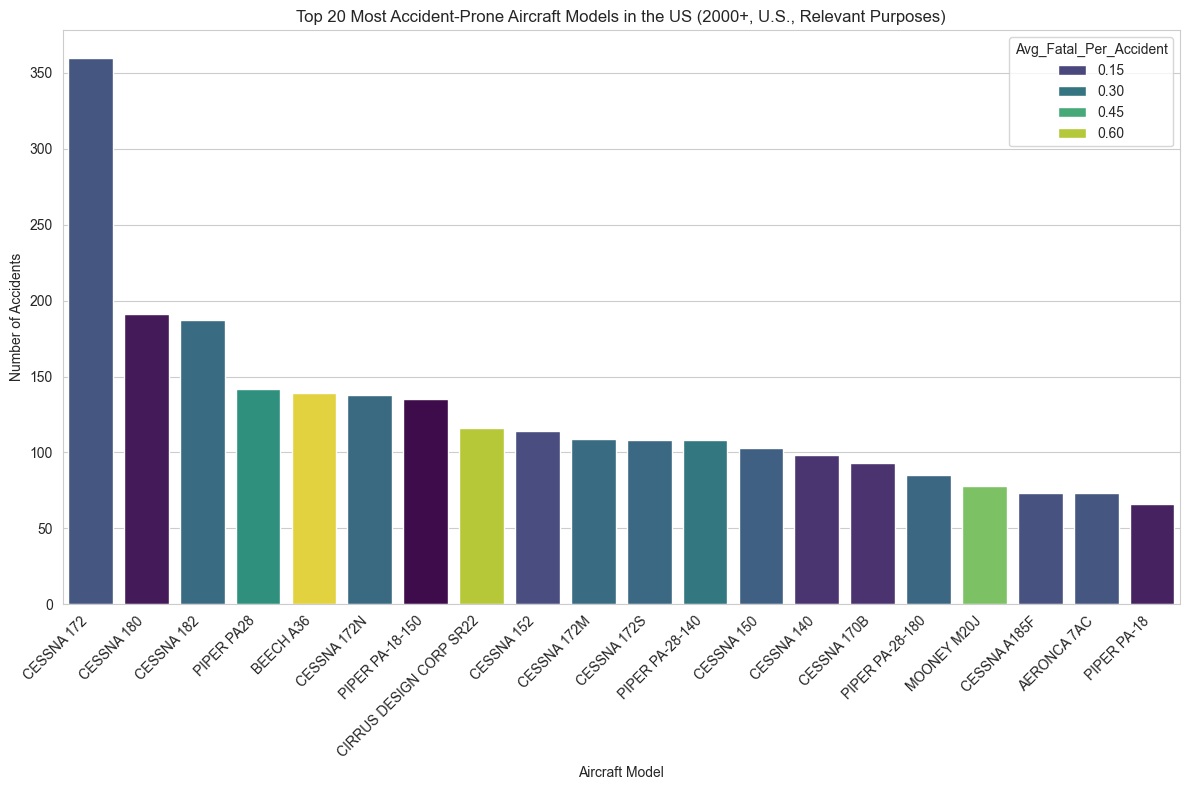

In [30]:
import seaborn as sns

sns.set_style('whitegrid')

top_models_df = model_group.sort_values('Accidents', ascending=False).head(20).reset_index()
top_models_df['Full_Model'] = top_models_df['Make'] + ' ' + top_models_df['Model']
plt.figure(figsize=(12, 8))
sns.barplot(data=top_models_df, x='Full_Model', y='Accidents', hue='Avg_Fatal_Per_Accident', palette='viridis')
plt.title('Top 20 Most Accident-Prone Aircraft Models in the US (2000+, U.S., Relevant Purposes)')
plt.xlabel('Aircraft Model') 
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

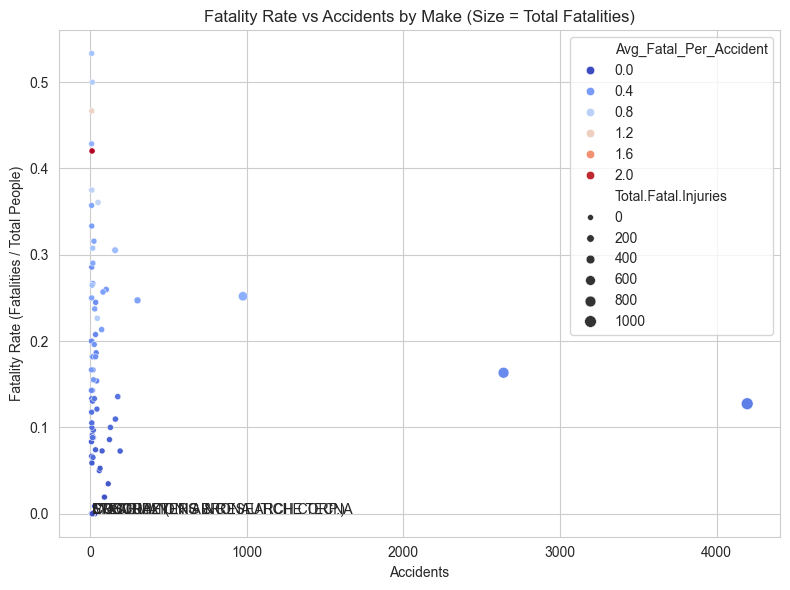

In [38]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Accidents', y='Fatality.Rate', data=make_group, size='Total.Fatal.Injuries', hue='Avg_Fatal_Per_Accident', palette='coolwarm')
for i in range(5):  # Label top 5 lowest risk
    plt.text(make_group.iloc[i]['Accidents'], make_group.iloc[i]['Fatality.Rate'], make_group.index[i])
plt.title('Fatality Rate vs Accidents by Make (Size = Total Fatalities)')
plt.xlabel('Accidents')
plt.ylabel('Fatality Rate (Fatalities / Total People)')
plt.tight_layout()
plt.show()



In [39]:
low_risk_models = model_group.head(10).style.background_gradient(cmap='Greens', subset=['Avg_Fatal_Per_Accident'])
display(low_risk_models)  